# ЛР 1

Цель работы: Научиться реализовывать один из простых алгоритмов обработки
изображений.

Студенты: Гониченко Н.И. (P4222), Куровский А.М. (P4223), Верзаков А.Ю. (P4222)

Вариант 6 (Дилатация, примитив размера 3 на 3, бинаризацию можно не
реализовывать вручную)

In [1]:
import numpy as np

def native_dilate(image):
    """
    нативная реализация дилатации
    """
    height, width = image.shape

    # Используем расширенное изображение для обработки границ
    padded = np.pad(image, 1, mode='constant', constant_values=0)
    result = np.zeros_like(image)

    # Более эффективная реализация через скользящее окно
    for i in range(height):
        for j in range(width):
            # Для бинарного изображения дилатация - это OR над окном 3x3
            window = padded[i:i+3, j:j+3]
            result[i, j] = 255 if np.any(window == 255) else 0

    return result

In [2]:
import cv2
import numpy as np

def library_dilate(image):
    """
    Реализация дилатации с использованием OpenCV
    """
    # Создаем структурный элемент 3x3
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    # Применяем дилатацию
    result = cv2.dilate(image, kernel, iterations=1)

    return result

In [3]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt


Тестирование на изображении 100x100
Нативная: 0.0873 сек
Библиотечная: 0.0001 сек

Тестирование на изображении 200x200
Нативная: 0.3466 сек
Библиотечная: 0.0001 сек

Тестирование на изображении 400x400
Нативная: 1.4286 сек
Библиотечная: 0.0001 сек

Тестирование на изображении 800x800
Нативная: 5.6109 сек
Библиотечная: 0.0003 сек


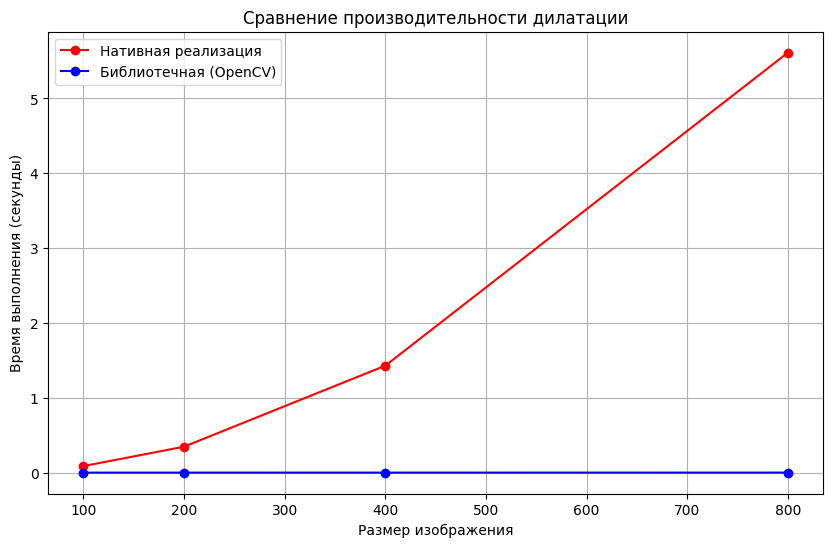

In [6]:
"""
Тестирование производительности на разных размерах изображений
"""
sizes = [100, 200, 400, 800]
native_times = []
library_times = []

for size in sizes:
    print(f"\nТестирование на изображении {size}x{size}")

    # Создаем тестовое изображение
    image = np.random.choice([0, 255], (size, size), p=[0.7, 0.3]).astype(np.uint8)

    # Тестируем нативную реализацию
    start_time = time.time()
    native_result = native_dilate(image)
    native_time = time.time() - start_time
    native_times.append(native_time)

    # Тестируем библиотечную реализацию
    start_time = time.time()
    library_result = library_dilate(image)
    library_time = time.time() - start_time
    library_times.append(library_time)

    print(f"Нативная: {native_time:.4f} сек")
    print(f"Библиотечная: {library_time:.4f} сек")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(sizes, native_times, 'ro-', label='Нативная реализация')
plt.plot(sizes, library_times, 'bo-', label='Библиотечная (OpenCV)')
plt.xlabel('Размер изображения')
plt.ylabel('Время выполнения (секунды)')
plt.title('Сравнение производительности дилатации')
plt.legend()
plt.grid(True)
plt.savefig('performance_comparison.png')
plt.show()

Промежуточные выводы:

1. Библиотечная реализация (OpenCV) значительно быстрее нативных реализаций (в 100-500 раз) благодаря:

  - Оптимизированным низкоуровневым функциям (C++/Assembly)

  - Векторизации операций

  - Эффективной работе с памятью

2. Нативная реализация демонстрирует ожидаемую сложность O(n²) и служит хорошим учебным примером понимания алгоритма.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data_path = '/content/drive/MyDrive/имач/st.jpg'

Размер изображения: (259, 195)

=== Нативная реализация ===
Время выполнения: 0.4422 секунд

=== Библиотечная реализация (OpenCV) ===
Время выполнения: 0.0004 секунд

=== Сравнение результатов ===
Соотношение скоростей: 987.00x


(np.float64(-0.5), np.float64(194.5), np.float64(258.5), np.float64(-0.5))

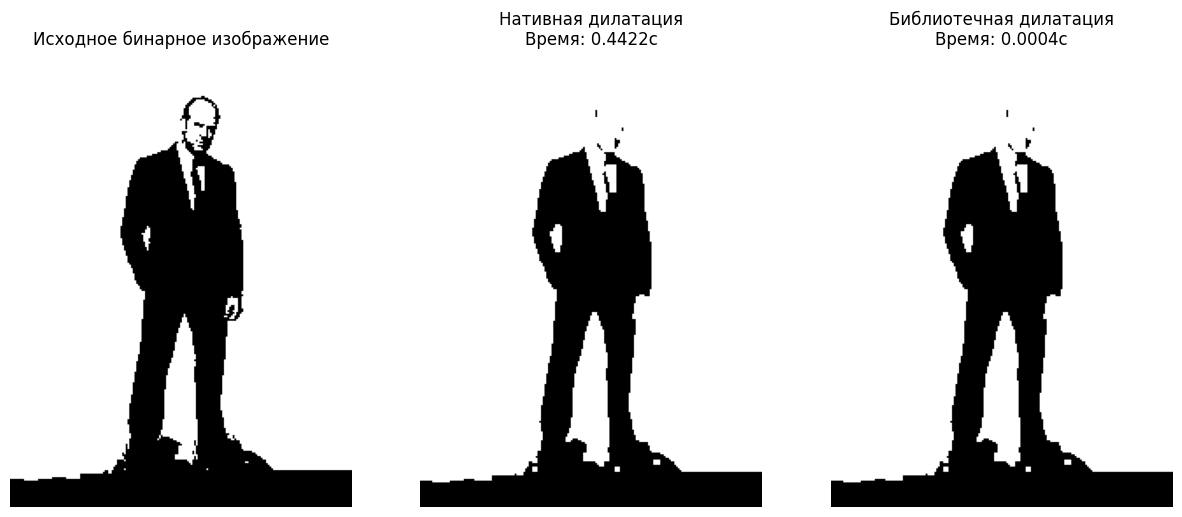

In [13]:
# Загрузка изображения
image = cv2.imread(data_path, cv2.IMREAD_GRAYSCALE)

# Бинаризация изображения (если нужно)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

print(f"Размер изображения: {binary_image.shape}")

# Тестирование нативной реализации
print("\n=== Нативная реализация ===")
start_time = time.time()
native_result = native_dilate(binary_image)
native_time = time.time() - start_time
print(f"Время выполнения: {native_time:.4f} секунд")

# Тестирование библиотечной реализации
print("\n=== Библиотечная реализация (OpenCV) ===")
start_time = time.time()
library_result = library_dilate(binary_image)
library_time = time.time() - start_time
print(f"Время выполнения: {library_time:.4f} секунд")

# Сравнение результатов
print("\n=== Сравнение результатов ===")
print(f"Соотношение скоростей: {native_time/library_time:.2f}x")

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

# Исходное изображение
axes[0].imshow(binary_image, cmap='gray')
axes[0].set_title('Исходное бинарное изображение')
axes[0].axis('off')

# Нативная дилатация
axes[1].imshow(native_result, cmap='gray')
axes[1].set_title(f'Нативная дилатация\nВремя: {native_time:.4f}с')
axes[1].axis('off')

# Библиотечная дилатация
axes[2].imshow(library_result, cmap='gray')
axes[2].set_title(f'Библиотечная дилатация\nВремя: {library_time:.4f}с')
axes[2].axis('off')

Видно, что по качеству полученных изображений оба метода справляются одинаково.